In [ ]:
pip install chart-studio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from plotly import tools
from chart_studio import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


df = pd.read_csv('bank data.csv')
term_deposits = df.copy()
data1=df.copy()
# Have a grasp of how our data looks.
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.shape


(11162, 17)

## Basic Data Exploration

In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


There is a very high standard deviation for Balance. This implies that the data is heavily distributed.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


[Text(0, 0, 'secondary'),
 Text(0, 0, 'tertiary'),
 Text(0, 0, 'primary'),
 Text(0, 0, 'unknown')]

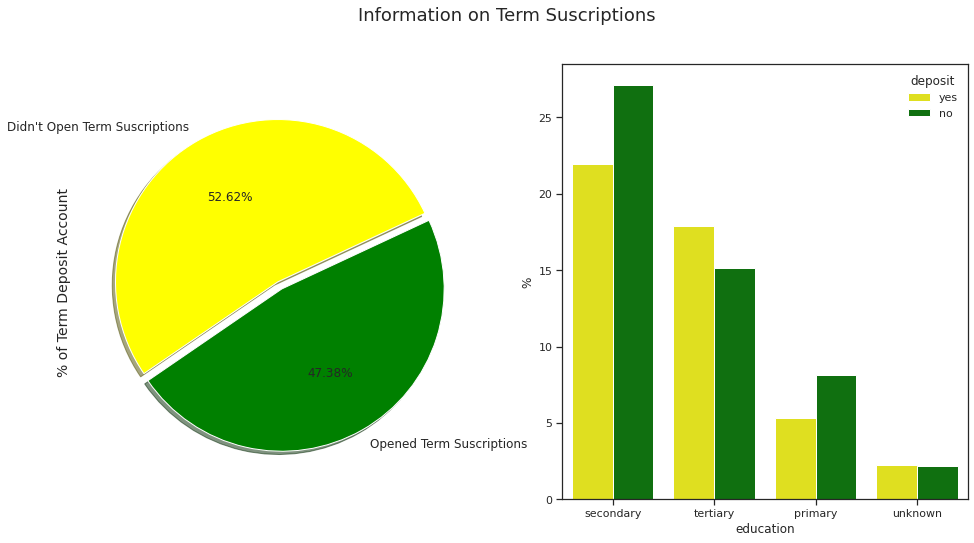

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

colors = ["yellow", "green"]
labels ="Didn't Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize=18)

df["deposit"].value_counts().plot.pie(explode=[0,0.05], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=25)


ax[0].set_ylabel('% of Term Deposit Account', fontsize=14)


palette = ["yellow", "green"]

sns.barplot(x="education", y="balance", data=df, hue="deposit", palette=palette, estimator= lambda x: len(x)/ len(df) * 100 )
ax[1].set(ylabel='%')
ax[1].set_xticklabels(df['education'].unique())




## Analyzing Numerical Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f11e2c7abd0>,
      dtype=object)

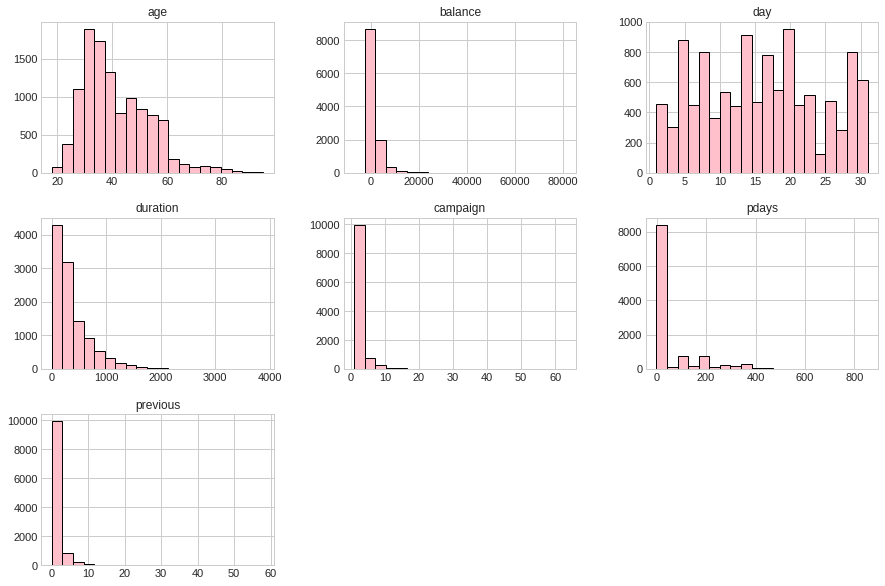

In [ ]:
plt.style.use('seaborn-whitegrid')

df.hist(bins=20, figsize=(15,10), color="pink", edgecolor="black")

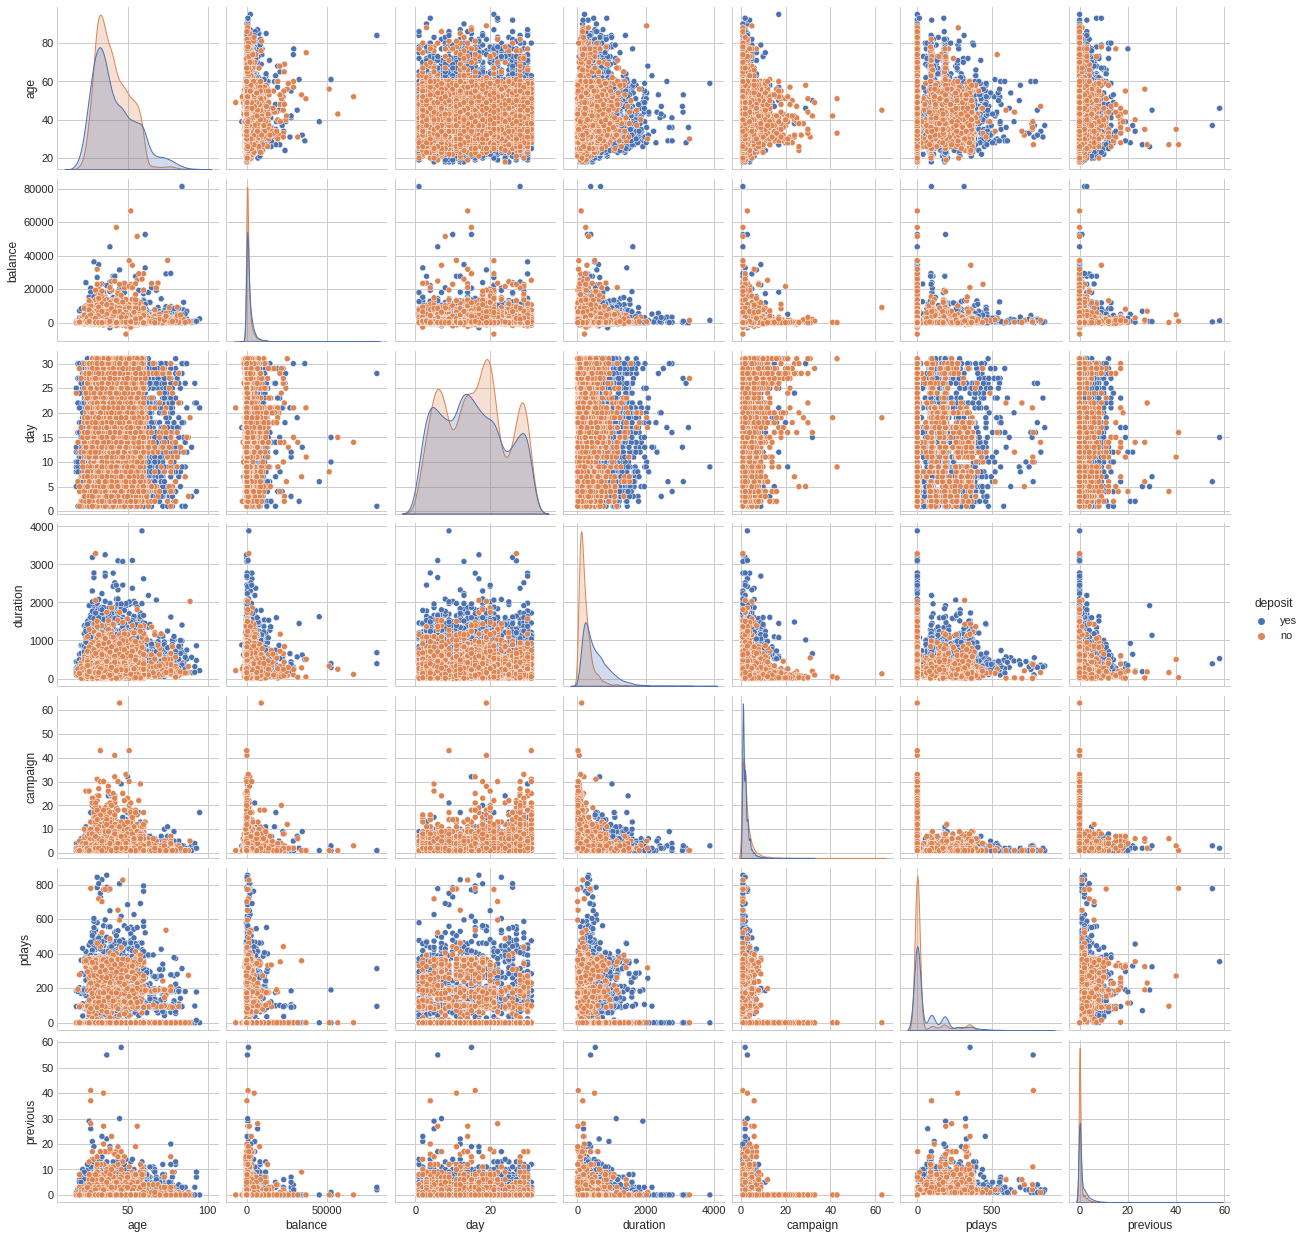

In [67]:
sns.pairplot(data=df, hue="deposit")

### Analysis of Yes vs No of Deposits

In [68]:
df["deposit"].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

Text(0.5, 1.0, 'Distribution of Balance by Education')

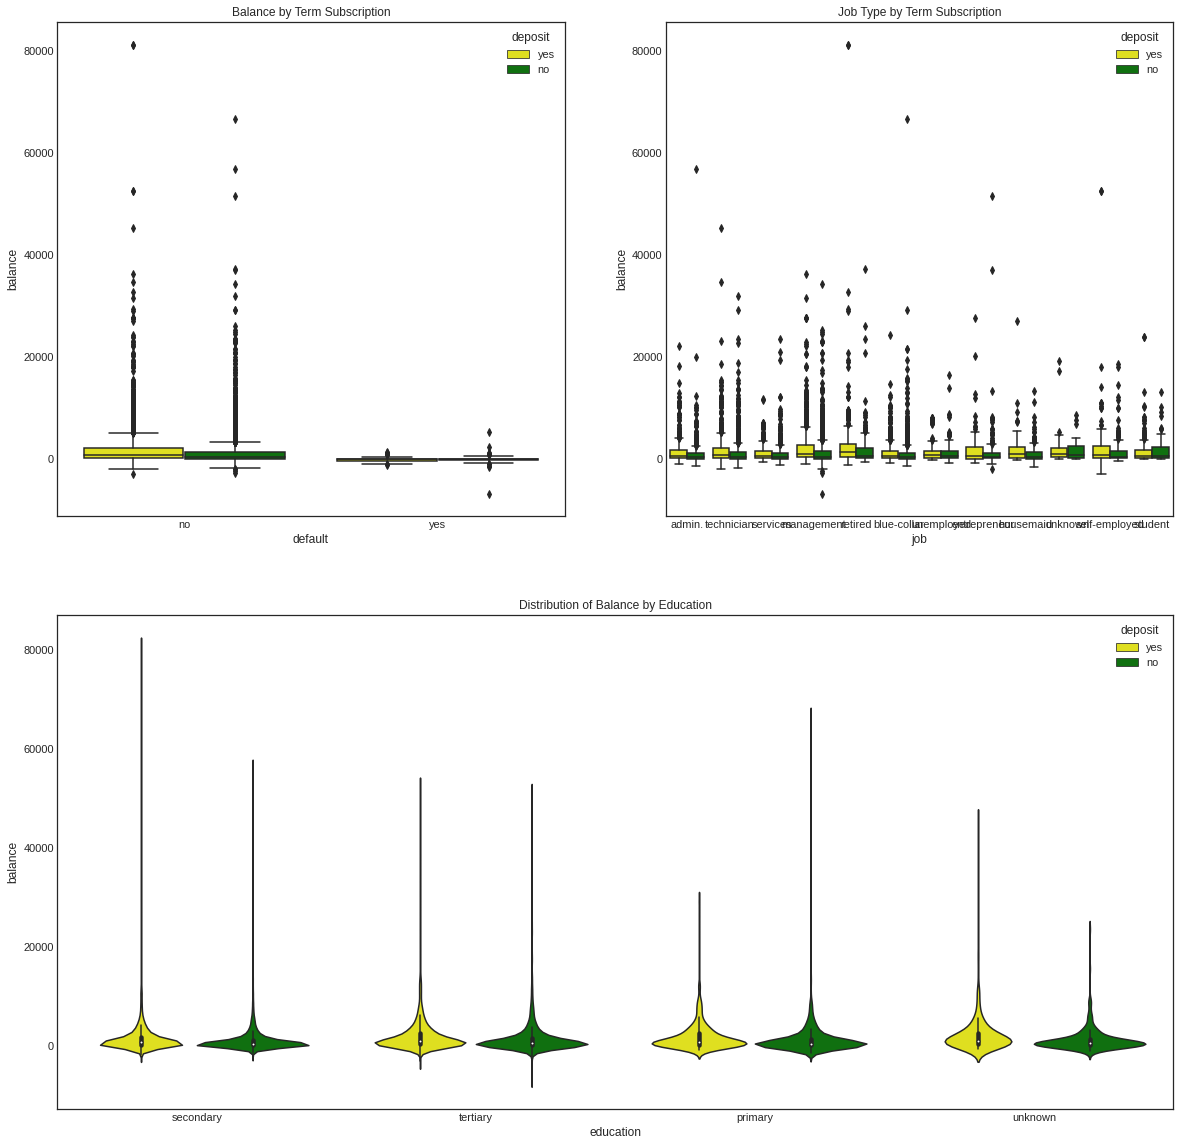

In [69]:
plt.style.use('seaborn-white')
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

palette=["yellow","green"]

g1 = sns.boxplot(x="default", y="balance", data=df, hue="deposit", palette=palette, ax=ax1)
g1.set_title("Balance by Term Subscription")

g2 = sns.boxplot(x="job", y="balance", data=df, hue="deposit", palette=palette, ax=ax2)
g2.set_title("Job Type by Term Subscription")
g2.set_xticklabels(df['job'].unique())

g3 = sns.violinplot(x="education", y="balance", data=df, hue="deposit", palette=palette)
g3.set_title("Distribution of Balance by Education")

In [70]:
df.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,39.374063,1195.866567,15.340330,347.929535,2.376312,64.338831,0.973763
blue-collar,39.505144,1203.926440,15.235597,394.658951,2.541152,44.061214,0.633230
entrepreneur,42.887195,1621.942073,15.442073,370.182927,2.725610,32.746951,0.536585
housemaid,47.445255,1366.160584,16.364964,348.346715,2.689781,33.540146,0.503650
management,40.218239,1793.663679,15.792284,361.482073,2.588075,54.456352,0.925175
retired,65.424165,2417.250643,15.519280,389.993573,2.131105,53.003856,0.994859
self-employed,39.809877,1865.372840,15.938272,396.155556,2.533333,45.039506,0.804938
services,38.141928,1081.171181,15.728061,385.955580,2.576381,51.546046,0.684724
student,26.102778,1500.783333,15.175000,330.672222,2.169444,68.683333,1.297222


In [ ]:
# Dropping the unknown jobs
df = df.drop(df.loc[df['job'] == 'unknown'].index)

# Admin and Managment are similar, so lets put them under one category
lst = [df]



## Distribution of Age of customers with respect to Occupation

In [ ]:
subscribed_df = df.loc[df["deposit"] == "yes"]

occupations = df["job"].unique().tolist()

# Get the balances by jobs
management = subscribed_df["age"].loc[subscribed_df["job"] == "management"].values
technician = subscribed_df["age"].loc[subscribed_df["job"] == "technician"].values
services = subscribed_df["age"].loc[subscribed_df["job"] == "services"].values
retired = subscribed_df["age"].loc[subscribed_df["job"] == "retired"].values
blue_collar = subscribed_df["age"].loc[subscribed_df["job"] == "blue-collar"].values
unemployed = subscribed_df["age"].loc[subscribed_df["job"] == "unemployed"].values
entrepreneur = subscribed_df["age"].loc[subscribed_df["job"] == "entrepreneur"].values
housemaid = subscribed_df["age"].loc[subscribed_df["job"] == "housemaid"].values
self_employed = subscribed_df["age"].loc[subscribed_df["job"] == "self-employed"].values
student = subscribed_df["age"].loc[subscribed_df["job"] == "student"].values

ages = [management, technician, services, retired, blue_collar, unemployed, 
         entrepreneur, housemaid, self_employed, student]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)',
          'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
         'rgba(229, 126, 56, 0.5)', 'rgba(229, 56, 56, 0.5)',
         'rgba(174, 229, 56, 0.5)', 'rgba(229, 56, 56, 0.5)']

traces = []

for xd, yd, cls in zip(occupations, ages, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Distribution of Ages by Occupation',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(224,255,246)',
    plot_bgcolor='rgb(251,251,251)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
fig.show(renderer="colab")



Text(0.5, 1.0, 'Job Distribution of Balances by Deposit Status')

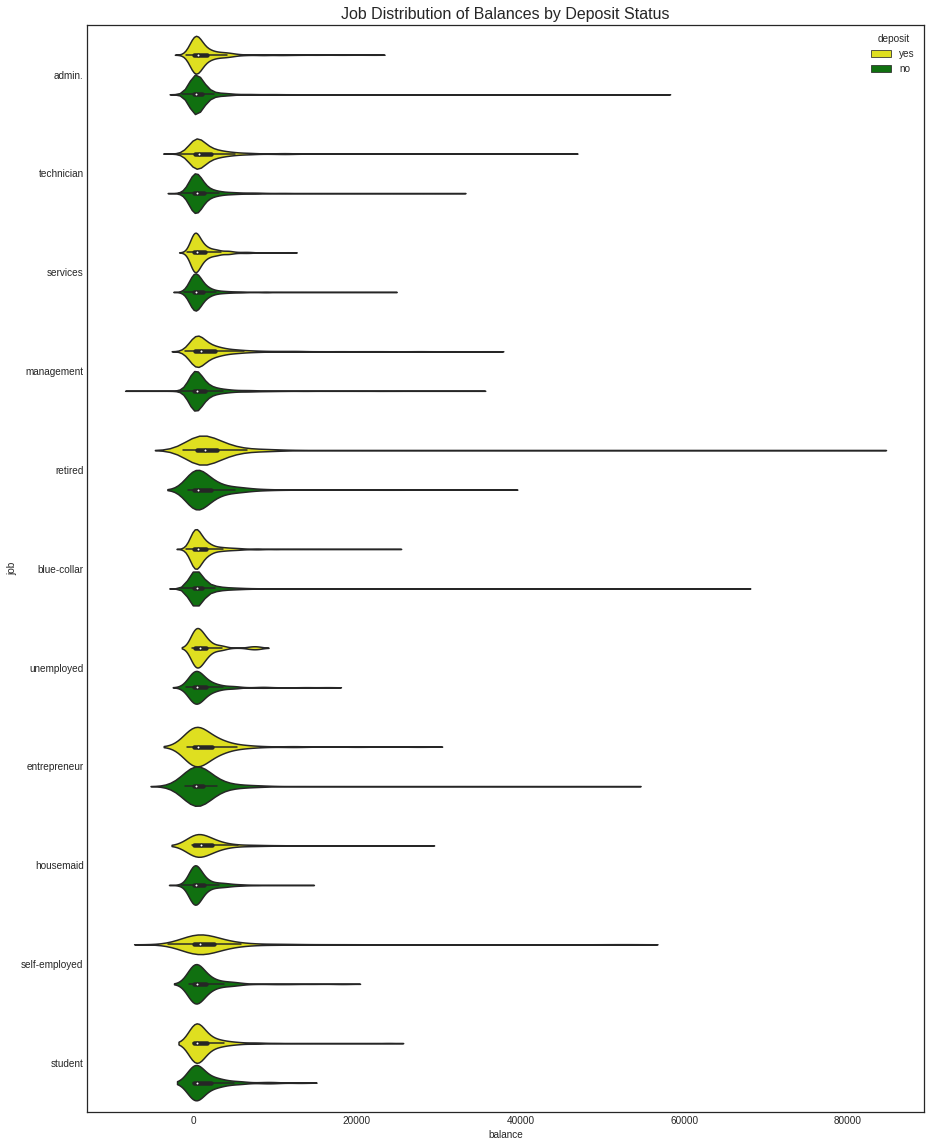

In [ ]:
# Balance Distribution
fig = plt.figure(figsize=(15,20))

sns.violinplot(x="balance", y="job", hue="deposit", palette=palette,
            data=df);

plt.title("Job Distribution of Balances by Deposit Status", fontsize=16)



In [ ]:
# Create a Balance Category
df["balance_status"] = np.nan
lst = [df]

for col in lst:
    col.loc[col["balance"] < 0, "balance_status"] = "negative"
    col.loc[(col["balance"] >= 0) & (col["balance"] <= 30000), "balance_status"] = "low"
    col.loc[(col["balance"] > 30000) & (col["balance"] <= 40000), "balance_status"] = "middle"
    col.loc[col["balance"] > 40000, "balance_status"] = "high"
    
# balance by balance_status
negative = df["balance"].loc[df["balance_status"] == "negative"].values.tolist()
low = df["balance"].loc[df["balance_status"] == "low"].values.tolist()
middle = df["balance"].loc[df["balance_status"] == "middle"].values.tolist()
high = df["balance"].loc[df["balance_status"] == "high"].values.tolist()


# Get the average by occupation in each balance category
job_balance = df.groupby(['job', 'balance_status'])['balance'].mean()


trace1 = go.Bar(
    x=[-199.0, -392.0, -209.0, -247.0, -233.0, -270.0, -271.0, 0, -276.0, -134.5],width=5,
    y=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='Negative Balance',
    marker=dict(
        color='rgb(246, 46, 46)'
    )
)
trace2 = go.Bar(
    x=[319.5, 283.0, 212.0, 313.0, 409.0, 274.5, 308.5, 253.0, 316.0, 330.0],width=5,
    y=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='Low Balance',
    marker=dict(
        color='rgb(246, 97, 46)'
    )
)
trace3 = go.Bar(
    x=[2128.5, 2686.0, 2290.0, 2366.0, 2579.0, 2293.5, 2005.5, 2488.0, 2362.0, 1976.0],width=5,
    y=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='Middle Balance',
    marker=dict(
        color='rgb(246, 179, 46)'
    )
)
trace4 = go.Bar(
    x=[14247.5, 20138.5, 12278.5, 12956.0, 20723.0, 12159.0, 12223.0, 13107.0, 12063.0, 15107.5],width=5,
    y=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='High Balance',
    marker=dict(
        color='rgb(46, 246, 78)'
    )
)


data = [trace1, trace2, trace3, trace4]


In [ ]:

layout = go.Layout(
    title='Mean Balance in Account<br> <i> by Job Occupation</i>',
    font=dict(
        size=12
    ),
    legend=dict(
        font=dict(
            size=16
        )
    )
)
fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")


## Analzying Data with respect to Marital Status

In [ ]:
df["marital"].value_counts()

married     6302
single      3499
divorced    1291
Name: marital, dtype: int64

In [ ]:
vals = df['marital'].value_counts().tolist()
labels = ['married', 'divorced', 'single']

data = [go.Bar(
            x=labels,
            y=vals,
    marker=dict(
    color="green")
    )]

layout = go.Layout(
    title="Count by Marital Status",
)

fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")
#iplot(fig, filename='basic-bar')

In [ ]:

# Distribution of Balances by Marital status
single = df['balance'].loc[df['marital'] == 'single'].values
married = df['balance'].loc[df['marital'] == 'married'].values
divorced = df['balance'].loc[df['marital'] == 'divorced'].values


single_dist = go.Histogram(
    x=single,
    
    name='single',
    marker=dict(
        color='purple'
    )
)


married_dist = go.Histogram(
    x=married,
     
    name='married',
    marker=dict(
        color='blue'
    )
)

divorced_dist = go.Histogram(
    x=divorced,
     
    name='divorced',
    marker=dict(
        color='green'
    )
)


fig = tools.make_subplots(rows=3, print_grid=False)

fig.append_trace(single_dist, 1, 1)
fig.append_trace(married_dist, 2, 1)
fig.append_trace(divorced_dist, 3, 1)


fig['layout'].update(showlegend=True, title="Balance Distributions by Marital Status",
                    height=1000, width=800)

fig.show(renderer="colab")

In [ ]:
fig = ff.create_facet_grid(
    df,
    y='balance',
    facet_row='marital',
    facet_col='deposit',
    trace_type='box',
)

fig.show(renderer="colab")

### We an see that Divorced people have less Balance compared to others.

## Analyzing the dependance of Balance on Education, Marital Status and Previous Loan History

In [ ]:
df = df.drop(df.loc[df["education"] == "unknown"].index)
df['education'].unique()

array(['secondary', 'tertiary', 'primary'], dtype=object)

In [ ]:
df['marital/education']=df['marital']+'/'+df['education']   
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,balance_status,marital/education
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,low,married/secondary
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,low,married/secondary
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,low,married/secondary
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,low,married/secondary
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,low,married/tertiary


In [ ]:
education_groups = df.groupby(['marital/education'], as_index=False)['balance'].median()
education_groups

,marital/education,balance
0,divorced/primary,414.0
1,divorced/secondary,361.5
2,divorced/tertiary,578.5
3,married/primary,518.5
4,married/secondary,556.0
5,married/tertiary,624.5
6,single/primary,398.0
7,single/secondary,454.5
8,single/tertiary,697.0


Text(0.5, 1.0, 'Median Balance by Educational/Marital Group')

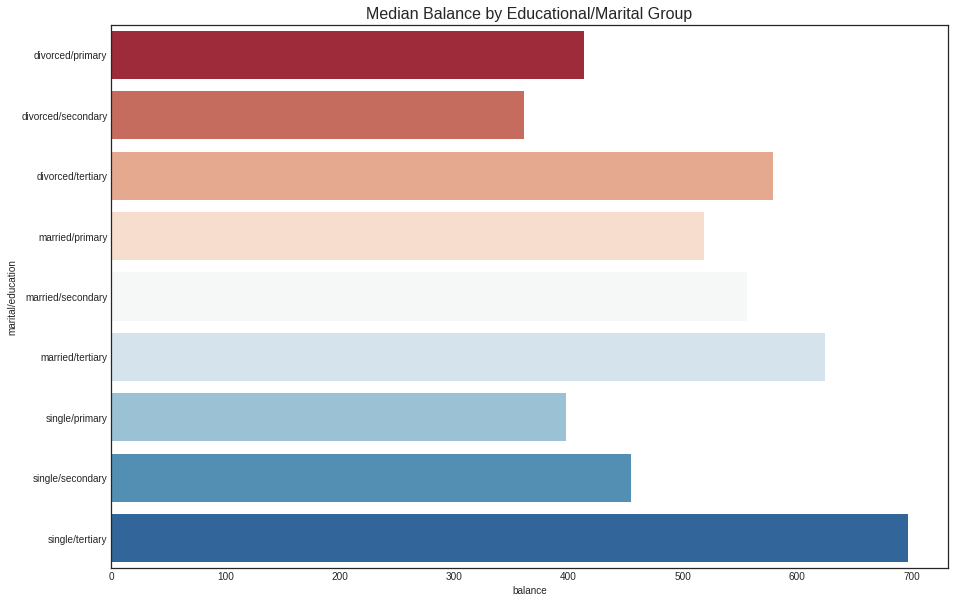

In [ ]:
fig = plt.figure(figsize=(15,10))

sns.barplot(x="balance", y="marital/education", data=education_groups,
            label="Total", palette="RdBu")

plt.title('Median Balance by Educational/Marital Group', fontsize=16)


Analyzing groups having loans


In [ ]:
loan_balance = df.groupby(['marital/education', 'loan'], as_index=False)['balance'].median()

no_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'no'].values
has_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'yes'].values

labels = loan_balance['marital/education'].unique().tolist()

trace0 = go.Scatter(
    x=no_loan,
    y=labels,
    mode='markers',
    name='No Loan',
    marker=dict(
        color='rgb(175,238,238)',
        line=dict(
            color='purple',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)
trace1 = go.Scatter(
    x=has_loan,
    y=labels,
    mode='markers',
    name='Has a Loan',
    marker=dict(
        color='rgb(250,128,114)',
        line=dict(
            color='yellow',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)

data = [trace0, trace1]

In [ ]:

layout = go.Layout(
    title="The Impact of Loans to Married/Educational Clusters",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        titlefont=dict(
            color='rgb(204, 204, 204)'
        ),
        tickfont=dict(
            color='rgb(102, 102, 102)',
        ),
        showticklabels=False,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(
        l=140,
        r=40,
        b=50,
        t=80
    ),
    legend=dict(
        font=dict(
            size=10,
        ),
        yanchor='middle',
        xanchor='right',
    ),
    width=1000,
    height=800,
    paper_bgcolor='rgb(255,250,250)',
    plot_bgcolor='rgb(255,255,255)',
    hovermode='closest',
)
fig = go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

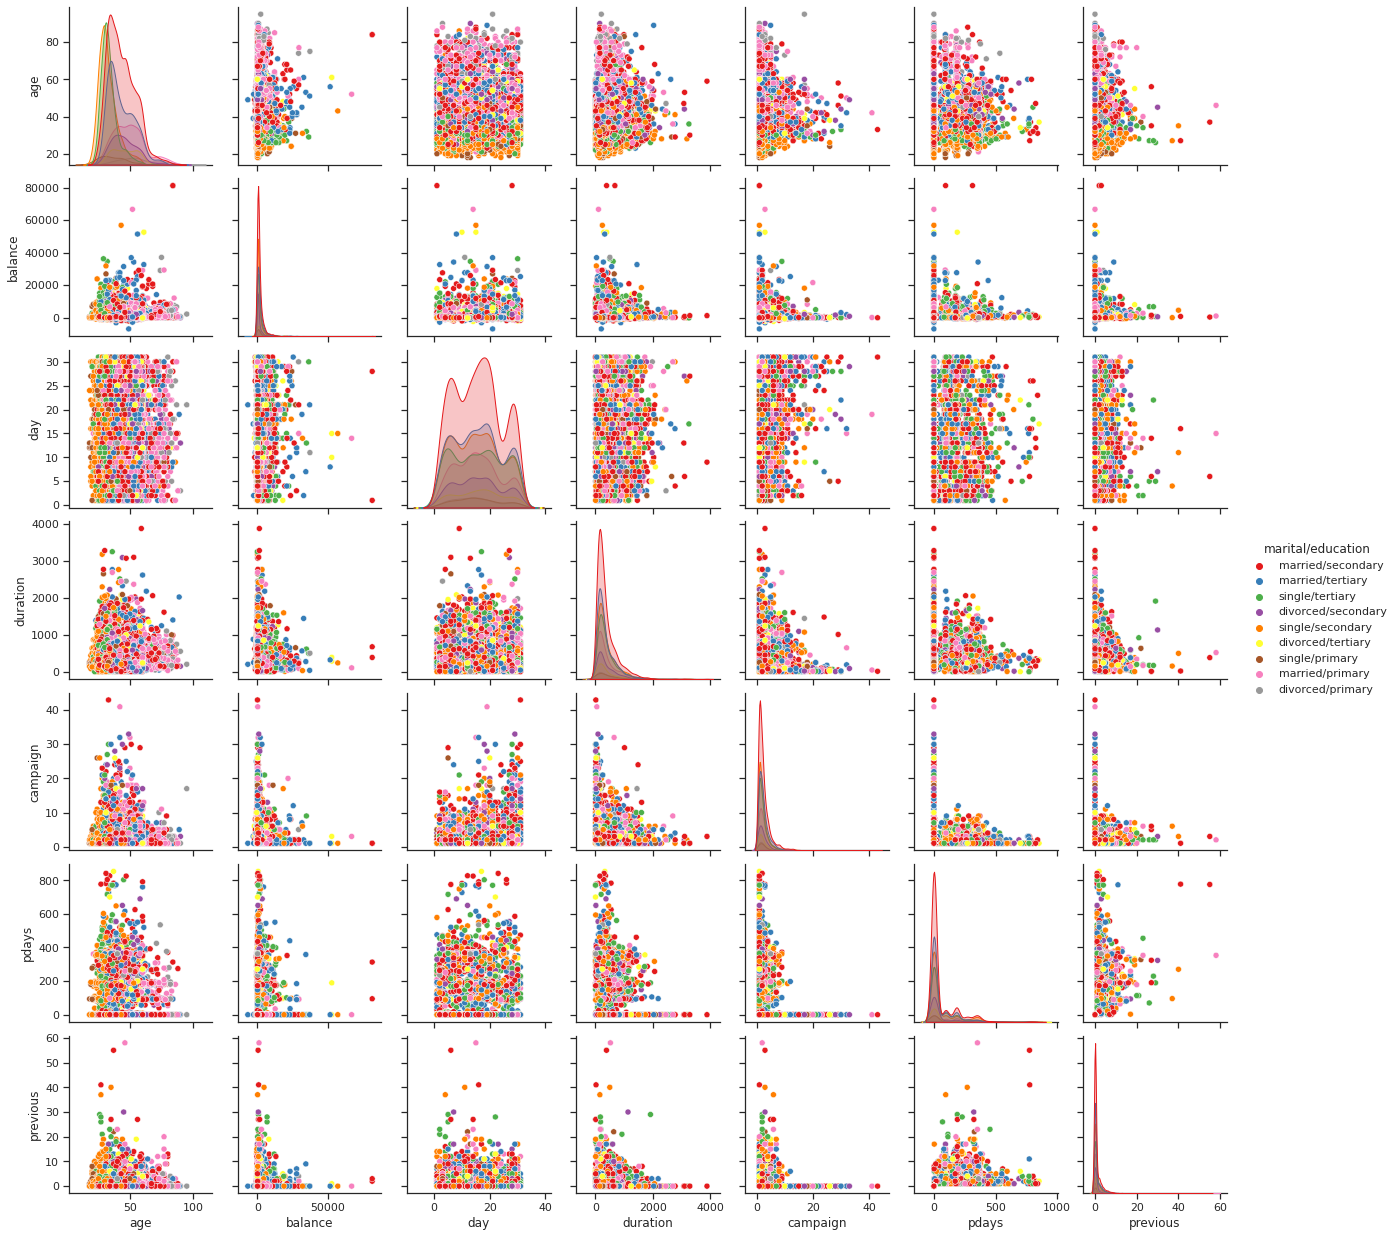

In [ ]:
sns.set(style="ticks")
sns.pairplot(df, hue="marital/education", palette="Set1")

## Correlation Matrix


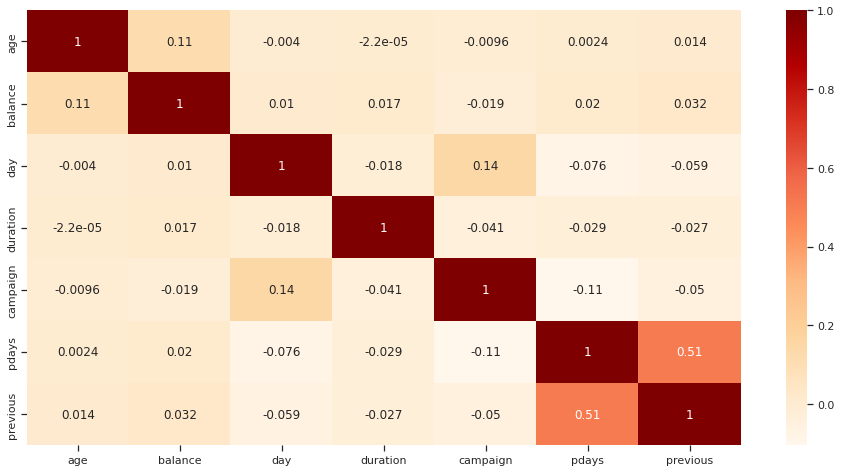

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot = True,cmap="OrRd")

## Classification Model

In [ ]:
term_deposits=df.copy()
term_deposits.deposit.value_counts()

no     5613
yes    5021
Name: deposit, dtype: int64

In [ ]:
term_deposits.deposit=term_deposits.deposit.map({'yes':1,'no':0})
term_deposits.housing=term_deposits.housing.map({'yes':1,'no':0})
term_deposits.deposit.value_counts()

0    5613
1    5021
Name: deposit, dtype: int64

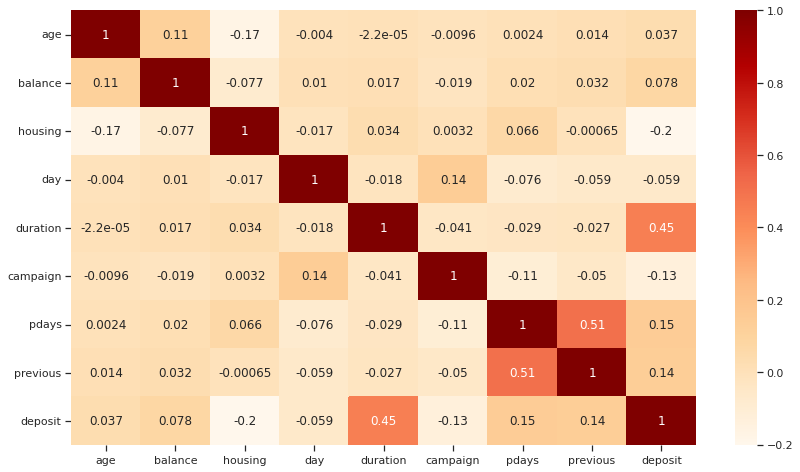

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(term_deposits.corr(), annot = True,cmap="OrRd")

In [ ]:
dep = term_deposits['deposit']
term_deposits.drop(labels=['deposit'], axis=1,inplace=True)
term_deposits.insert(0, 'deposit', dep)
#term_deposits.head()

term_deposits["housing"].value_counts()/len(term_deposits)

0    0.52003
1    0.47997
Name: housing, dtype: float64

In [ ]:
# Percentage distribution of Housing Loans
term_deposits["housing"].value_counts()/len(term_deposits)

0    0.52003
1    0.47997
Name: housing, dtype: float64

In [ ]:
df_new=pd.get_dummies(data1, drop_first=True)
df_new.head()


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes
0,59,2343,5,1042,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
1,56,45,5,1467,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
2,41,1270,5,1389,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
3,55,2476,5,579,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
4,54,184,5,673,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1


In [ ]:
df_new["loan_yes"].value_counts()/len(term_deposits)*100


0    91.235659
1    13.729547
Name: loan_yes, dtype: float64

## Stratified Sampling

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=40)

for train_set, test_set in stratified.split(df_new, df_new["loan_yes"]):
  stratified_train = df_new.loc[train_set]
  stratified_test = df_new.loc[test_set]




In [ ]:
stratified_train["loan_yes"].value_counts() / len(stratified_train) * 100

0    86.919028
1    13.080972
Name: loan_yes, dtype: float64

In [ ]:
stratified_test["loan_yes"].value_counts() / len(stratified_test) * 100

0    86.923421
1    13.076579
Name: loan_yes, dtype: float64

In [ ]:
train_data = stratified_train 
test_data = stratified_test

In [ ]:

train_data['deposit_yes'].value_counts()

0    4708
1    4221
Name: deposit_yes, dtype: int64

In [ ]:
test_data['deposit_yes'].value_counts()

0    1165
1    1068
Name: deposit_yes, dtype: int64

### Separate labels(y) and the features(X)

In [ ]:
X_train = train_data.drop(['deposit_yes'], axis = 1)
y_train = train_data["deposit_yes"]
X_test = test_data.drop(['deposit_yes'], axis = 1)
y_test = test_data["deposit_yes"]

### Let's scale Numerical Features to a common scale

In [ ]:

numerical_columns = ['age','balance','day','duration','campaign','pdays','previous']
train_data[numerical_columns].head()

,age,balance,day,duration,campaign,pdays,previous
8307,39,522,14,225,7,350,2
4068,77,820,21,330,2,181,4
10196,46,306,11,289,5,-1,0
7007,33,5083,27,161,1,96,2
4553,60,362,29,816,6,-1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data[numerical_columns]=scaler.fit_transform(train_data[numerical_columns])
test_data[numerical_columns]=scaler.transform(test_data[numerical_columns])
train_data[numerical_columns].head()


,age,balance,day,duration,campaign,pdays,previous
8307,-0.190792,-0.316476,-0.193506,-0.420675,1.593106,2.728464,0.529519
4068,3.003995,-0.223638,0.636603,-0.116465,-0.187136,1.183481,1.433809
10196,0.397722,-0.383767,-0.549266,-0.235252,0.881009,-0.480347,-0.374770
7007,-0.695232,1.104436,1.348124,-0.606098,-0.543184,0.406418,0.529519
4553,1.574748,-0.366321,1.585298,1.291593,1.237058,-0.480347,-0.374770


## Creating a baseline model for benchmarking

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
baselog_model = LogisticRegression()
baselog_model.fit(X_train, y_train)
y_pred = baselog_model.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.7863860277653381


## Using advanced Classification Algorithms for prediction and Comparing their Accuracy


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

dict_of_algos={'LR':LogisticRegression(),'svc':SVC(),'KNC':KNeighborsClassifier(),'DT':tree.DecisionTreeClassifier(),'MLPc':MLPClassifier(),
               'GRBC':GradientBoostingClassifier(),'RFC':RandomForestClassifier(),'GNB':GaussianNB()}

In [ ]:

def accuracy_of_algos(dict_of_algos):
    dict_of_accuracy={}
    for k,v in dict_of_algos.items():
        v.fit(X_train,y_train)
        y_pred = v.predict(X_test)
        dict_of_accuracy[k] = accuracy_score(y_pred,y_test)
        #y=v.score(X_train,y_train)
    return dict_of_accuracy

dict_of_accuracy = accuracy_of_algos(dict_of_algos)

for k, v in dict_of_accuracy.items():
  print(k," : ", v)

LR  :  0.7863860277653381
svc  :  0.7277205553067622
KNC  :  0.7456336766681594
DT  :  0.781012091356919
MLPc  :  0.6995073891625616
GRBC  :  0.8441558441558441
RFC  :  0.8526645768025078
GNB  :  0.729064039408867


In [ ]:
import time

no_classifiers = len(dict_of_algos.keys())

def batch_classify(X_train, Y_train,X_test, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,4)), columns = ['classifier', 'train_score', 'training_time','test_score'])
    count = 0
    for key, classifier in dict_of_algos.items():
        t_start = time.clock()
        classifier.fit(X_train, Y_train)
        t_end = time.clock()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        
        y_pred=classifier.predict(X_test)
        test_score=accuracy_score(y_test,y_pred)
        
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = t_diff
        df_results.loc[count,'test_score']=test_score
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

In [ ]:
df_results = batch_classify(X_train, y_train,X_test)
print(df_results.sort_values(by='train_score', ascending=False))

trained LR in 0.49 s
trained svc in 5.05 s
trained KNC in 0.00 s
trained DT in 0.09 s
trained MLPc in 2.49 s
trained GRBC in 1.88 s
trained RFC in 1.23 s
trained GNB in 0.01 s
  classifier  train_score  training_time  test_score
3         DT     1.000000       0.090986    0.787282
6        RFC     1.000000       1.226715    0.854008
5       GRBC     0.860679       1.875658    0.843708
2        KNC     0.819801       0.004955    0.745634
0         LR     0.797066       0.486768    0.786386
4       MLPc     0.792474       2.489842    0.772056
1        svc     0.742636       5.053346    0.727721
7        GNB     0.732221       0.014605    0.729064


### We can see that some classifiers are overtfitting. Let us use cross validation technique for solving this issue

In [ ]:
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=3)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, X_train, y_train, cv=3)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=3)
nav_mean = nav_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC', 'Neural Classifier', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

In [ ]:
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

,Classifiers,Crossval Mean Scores
4,Grad B CLF,0.845111
5,Rand FC,0.837608
0,Logistic Reg.,0.787769
6,Neural Classifier,0.784857
3,Dec Tree,0.780266
2,KNN,0.744988
1,SVC,0.740396
7,Naives Bayes,0.730206


## Choosing Gradient Boosting Algorithm as our final model

In [ ]:
grad_clf = GradientBoostingClassifier()
grad_clf.fit(X_train, y_train)
y_pred=grad_clf.predict(X_test)
print("Accuracy - ", accuracy_score(y_test, y_pred))

[Text(0, 0.5, 'Actual False Deposits'), Text(0, 1.5, 'Actual Deposits')]

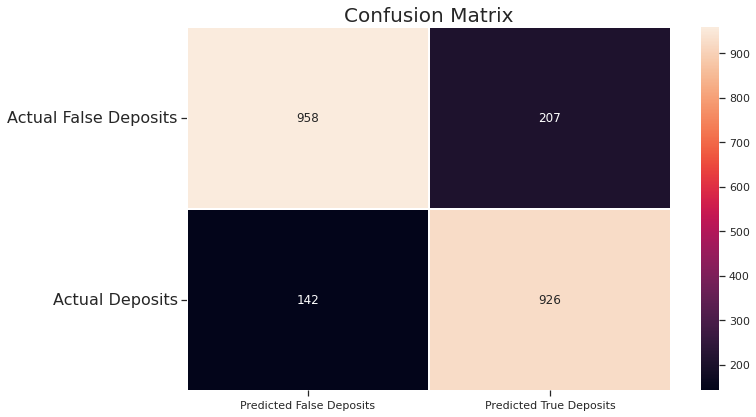

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(["Predicted False Deposits",'Predicted True Deposits'])
ax.set_yticklabels(['Actual False Deposits', 'Actual Deposits'], fontsize=16, rotation=360)


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision : ", round(precision_score(y_pred, y_test)* 100, 2), "%")
print("Recall : ", round(recall_score(y_pred, y_test)* 100, 2), "%")
print("F1-Score : ", round(f1_score(y_pred, y_test)* 100, 2), "%")

Precision :  86.7 %
Recall :  81.73 %
F1-Score :  84.14 %


[0.03335294 0.03338399 0.03339634 ... 0.98667772 0.98716617 0.98765669]


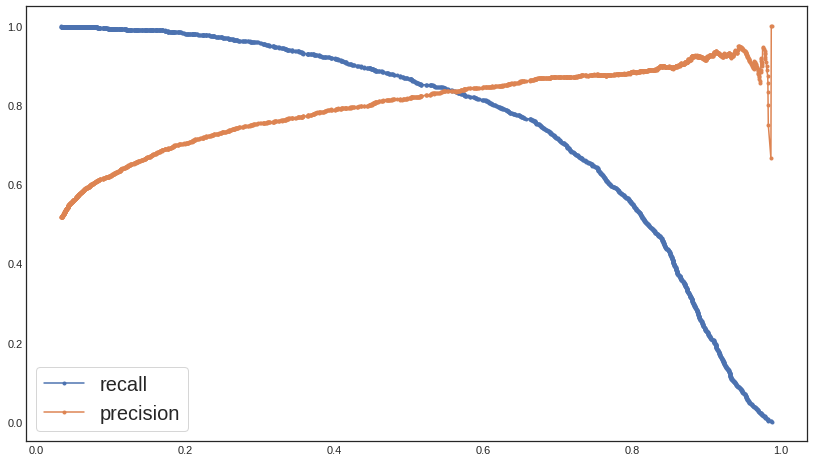

In [71]:
#The Probablity threshold for Balanced value of Precision vs Recall
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(14,8))
y_prob=grad_clf.predict_proba(X_test)[:,1]
precisions, recalls, threshold = precision_recall_curve(y_test, y_prob)
plt.plot(threshold,recalls[:-1],marker='.',label='recall')
plt.plot(threshold,precisions[:-1],marker='.',label='precision')
plt.legend(frameon=True,fontsize=20)
#plt.axvline(x=0.563,c='black')
print(threshold)

In [72]:

from sklearn.metrics import roc_auc_score

print('Gradient Boost Classifier Score: ', roc_auc_score(y_test, y_prob))

Gradient Boost Classifier Score:  0.915054411599235


In [73]:
from sklearn.metrics import roc_curve
grd_fpr, grd_tpr, threshold = roc_curve(y_test, y_prob)

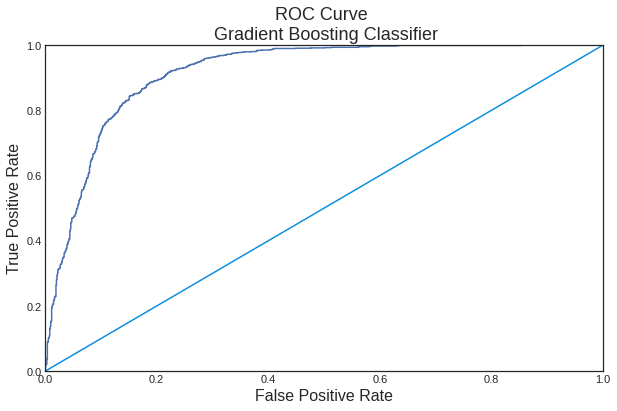

In [74]:
def graph_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.figure(figsize=(10,6))
    plt.title('ROC Curve \n Gradient Boosting Classifier', fontsize=18)
    plt.plot(false_positive_rate, true_positive_rate, label=label)
    plt.plot([0, 1], [0, 1], '#0C8EE0')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

    
    
graph_roc_curve(grd_fpr, grd_tpr, threshold)

## Suggestions and Conclusions for the Next Marketing Campaign:



1.   **Term Deposit Prediction**: Our Model predicts with 84.6% Accuracy for new customers based on Data that whether he is going to opne a Term Deposit or Not.

2.   **Campaign Calls**: Maximum 3 marketing calls should be placed to any potential customer.

3.   **Age** : 20s or below that age or 60 and above are the best targets as the probability of success of marketing call is higher.

4.   **Occupation** : Students and retired people are the best targets.

5.   **House Loan and Balances** : We can observe that people with housing loans have a lesser balance, and hence have a lower probability of opening a term deposit. Hence people with no housing loans and higher balances are a better target for the marketing campaign.

6.   **Duration of call** : We can notice that the duration of call is highly correlated to the customer opening a term deposit. The higher the call duration, the better the chances of opening a term deposit. Therefore, the sales agent should have an interactive call with the customer.



